In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

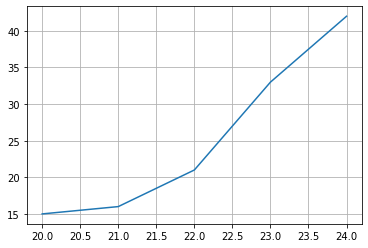

In [7]:
plt.plot(x, y)
plt.grid()
plt.show()

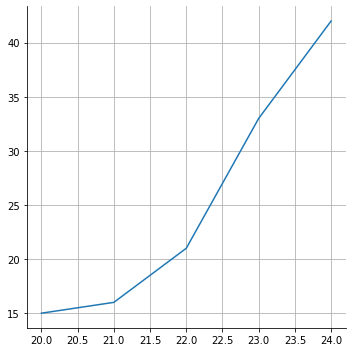

In [8]:
sns.relplot(x=x, y=y, kind='line')
plt.grid()
plt.show()

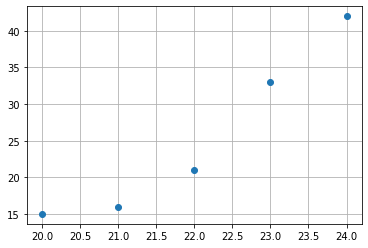

In [9]:
plt.plot(x, y, 'o')
plt.grid()
plt.show()

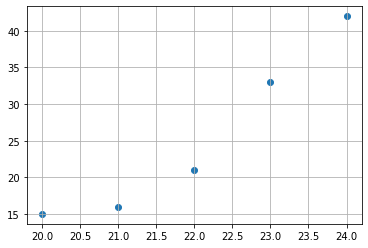

In [10]:
plt.scatter(x, y)
plt.grid()
plt.show()

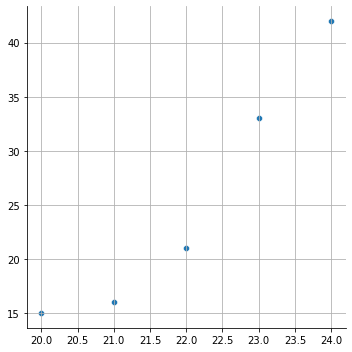

In [11]:
sns.relplot(x=x, y=y)
plt.grid()
plt.show()

In [15]:
model = LinearRegression().fit(x.reshape(-1, 1), y)

In [16]:
model.coef_

array([7.1])

In [18]:
model.intercept_

-130.79999999999998

In [20]:
model.score(x.reshape(-1,1), y)

0.9178805535324108

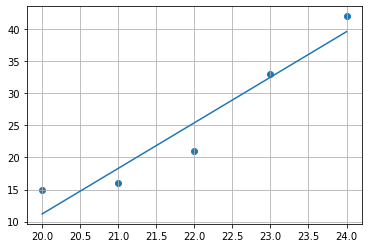

In [21]:
a, b = model.coef_[0], model.intercept_

plt.scatter(x, y)
plt.plot(x, a*x+b)
plt.grid()
plt.show()

In [23]:
model.predict([[30]])

array([82.2])

In [24]:
rawTrain = pd.read_csv('california_housing_test.csv')
rawTest = pd.read_csv('california_housing_test.csv')

In [26]:
features = rawTrain.drop(columns='median_house_value')

In [28]:
target = rawTrain['median_house_value']

In [34]:
features.corr().style.background_gradient().set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.00,-0.93,-0.06,0.05,0.07,0.11,0.05,-0.02
latitude,-0.93,1.00,-0.03,-0.04,-0.07,-0.12,-0.07,-0.07
housing_median_age,-0.06,-0.03,1.00,-0.37,-0.32,-0.30,-0.31,-0.14
total_rooms,0.05,-0.04,-0.37,1.00,0.94,0.84,0.91,0.22
total_bedrooms,0.07,-0.07,-0.32,0.94,1.00,0.86,0.97,0.02
population,0.11,-0.12,-0.30,0.84,0.86,1.00,0.90,0.03
households,0.05,-0.07,-0.31,0.91,0.97,0.90,1.00,0.05
median_income,-0.02,-0.07,-0.14,0.22,0.02,0.03,0.05,1.00


In [35]:
import myLib as my

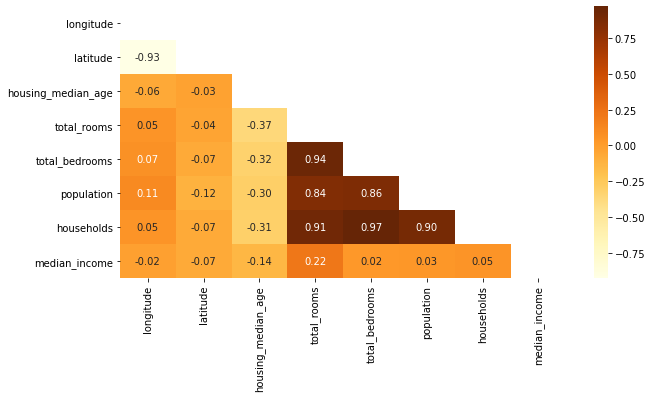

In [36]:
my.prettyCorr(features, width=10, height=5)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [64]:
features.values

array([[-122.05  ,   37.37  ,   27.    , ..., 1537.    ,  606.    ,
           6.6085],
       [-118.3   ,   34.26  ,   43.    , ...,  809.    ,  277.    ,
           3.599 ],
       [-117.81  ,   33.78  ,   27.    , ..., 1484.    ,  495.    ,
           5.7934],
       ...,
       [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
           2.2895],
       [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
           3.2708],
       [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
           8.5608]])

In [56]:
def vif(x):
    vifFrame = pd.DataFrame()
    vifFrame['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]
    vifFrame['features'] = x.columns
    return vifFrame

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vifFrame = pd.DataFrame()

In [80]:
vifFrame['vif factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

In [82]:
vifFrame['features'] = features.columns

In [83]:
vifFrame

,vif factor,features
0,635.746927,longitude
1,559.404007,latitude
2,7.485312,housing_median_age
3,34.720733,total_rooms
4,83.126152,total_bedrooms
5,16.387224,population
6,69.616418,households
7,8.646577,median_income


In [88]:
vif(features.drop(columns=['longitude', 'total_bedrooms', 'total_rooms', 'households', 'latitude']))

,vif factor,features
0,2.884470,housing_median_age
1,2.252488,population
2,3.450556,median_income


In [93]:
features.drop(columns=['longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms']).corr()\
    .style.background_gradient(cmap='coolwarm')

,housing_median_age,population,median_income
housing_median_age,1.000000,-0.299888,-0.144315
population,-0.299888,1.000000,0.032361
median_income,-0.144315,0.032361,1.000000


In [ ]:
def prettyCorr(x, width=15, height=7):
    plt.figure(figsize=(width, height))
    mask = np.zeros_like(x.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
    plt.show()

<AxesSubplot:>

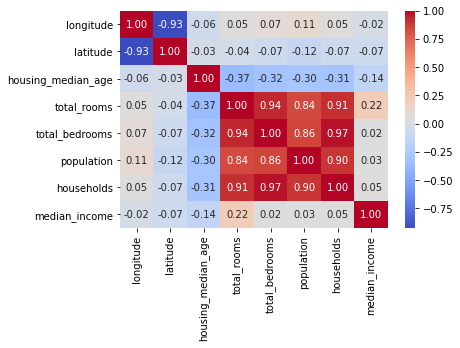

In [103]:
sns.heatmap(features.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [104]:
def adjustedR2(x, y, yhat):
    if x.ndim == 1: p, n = 1, x.shape[0]
    else: p, n = x.shape[1], x.shape[0]
    r2 = 1 - ( np.sum( (y - yhat) ** 2)) / np.sum( (y - np.mean(y)) ** 2 )
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return {'r2': r2, 'adjustedR2': adj_r2}

In [ ]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in x.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predict(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append( {'model': tmp, 'score': score['adjustedR2'], 'columns': columns} )
    
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [105]:
def forward(model, x, y, selected_columns):
    forward_columns = [col for col in x.columns if col not in selected_columns]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predicst(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append({tmp, score['adjustedR2'], columns})

In [106]:
forward(features, target)

TypeError: forward() missing 2 required positional arguments: 'y' and 'selected_columns'

In [ ]:
def forward(model, x, y, selected_columns):
    forward_columns = [col for col in ]

In [ ]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in x.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predict(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append( {'model': tmp, 'score': score['adjustedR2'], 'columns': columns} )

In [ ]:
def forward_select(x, y):
    selected_columns = []
    if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        ret = forward(model, x, y, selected_columns)
  
        if not i:
            before_model = ret
        else: 
            if ret.score > before_model.score: before_model = ret
            else: break
        selected_columns = ret.columns
    return before_model

In [180]:
def forward(model, x, y, selected_columns):
    forward_columns = [col for col in x.columns if col not in selected_columns]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predict(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append({'model': tmp, 'score': score['adjustedR2'], 'columns': columns})
    models = pd.DataFrame(result)
    best_model = models.loc[models.score.argmax()]
    return best_model

In [179]:
forward(LinearRegression(), features, target, features.columns[:-1].to_list())['columns'][0]

'longitude'

In [166]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [185]:
def forward_select(x, y):
    selected_columns = []
    if isinstance(y, pd.DataFrame): y = y.to_numpy()
    
    before_model_list = []
    
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        ret = forward(model, x, y, selected_columns)
        
        if not i:
            before_model = ret
        else:
            if ret.score > before_model.score: before_model = ret
            else: break
        selected_columns = ret.columns

        before_model_list.append(before_model)
        
    return pd.DataFrame(before_model_list)

In [189]:
for x in forward_select(features, target)['columns']:
    print(x)

['median_income']
['median_income', 'housing_median_age']
['median_income', 'housing_median_age', 'total_bedrooms']
['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms']
['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population']
['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population', 'households']
['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population', 'households', 'latitude']
['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population', 'households', 'latitude', 'longitude']


In [114]:
import myLib

In [115]:
myLib.forward_select(features, target)

model                                     LinearRegression()
score                                               0.619331
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [141]:
forward(LinearRegression(), x=features, y=target, selected_columns=features.columns)

AttributeError: 'DataFrame' object has no attribute 'score'

In [142]:
myLib.forward(model=LinearRegression(), x=features, y=target, selected_columns=features.columns)

AttributeError: 'DataFrame' object has no attribute 'score'

In [1]:
import myLib

In [3]:
import pandas as pd

In [8]:
rawTrain = pd.read_csv("california_housing_train.csv")

In [9]:
features = rawTrain.drop(columns='median_house_value')

In [10]:
target = rawTrain['median_house_value']

In [11]:
myLib.forward_select(features, target)

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [19]:
def adjustedR2(x, y, yhat):
    if x.ndim == 1: p, n = 1, x.shape[0]
    else: p, n = x.shape[1], x.shape[0]
    r2 = 1 - ( np.sum( (y - yhat) ** 2)) / np.sum( (y - np.mean(y)) ** 2 )
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return {'r2': r2, 'adjustedR2': adj_r2}

In [30]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in x.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predict(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append( {'model': tmp, 'score': score['adjustedR2'], 'columns': columns} )
    
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [28]:
def forward_select(x, y):
    selected_columns = []
    list_ = []
    if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        ret = forward(model, x, y, selected_columns)
    
        if not i:
            before_model = ret
        else: 
            if ret.score > before_model.score: before_model = ret
            else: break
        selected_columns = ret.columns
        list_.append(before_model.columns)
    return list_

In [31]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [29]:
forward_select(features, target)

[['median_income'],
 ['median_income', 'housing_median_age'],
 ['median_income', 'housing_median_age', 'total_bedrooms'],
 ['median_income', 'housing_median_age', 'total_bedrooms', 'population'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude',
  'longitude'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude',
  'longitude',
  'households']]

In [36]:
features[features.columns[7]]

0        1.4936
1        1.8200
2        1.6509
3        3.1917
4        1.9250
          ...  
16995    2.3571
16996    2.5179
16997    3.0313
16998    1.9797
16999    3.0147
Name: median_income, Length: 17000, dtype: float64

In [45]:
features[features.columns[7]].to_numpy

<bound method IndexOpsMixin.to_numpy of 0        1.4936
1        1.8200
2        1.6509
3        3.1917
4        1.9250
          ...  
16995    2.3571
16996    2.5179
16997    3.0313
16998    1.9797
16999    3.0147
Name: median_income, Length: 17000, dtype: float64>

In [51]:
features

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
forward_select(features, target)

[['median_income'],
 ['median_income', 'housing_median_age'],
 ['median_income', 'housing_median_age', 'total_bedrooms'],
 ['median_income', 'housing_median_age', 'total_bedrooms', 'population'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude',
  'longitude'],
 ['median_income',
  'housing_median_age',
  'total_bedrooms',
  'population',
  'total_rooms',
  'latitude',
  'longitude',
  'households']]

In [67]:
model = LinearRegression()
tmp = model.fit(features[[features.columns[2]]], target)
yhat = tmp.predict(features[[features.columns[2]]])
score = adjustedR2(features[[features.columns[2]]], target, yhat)
score

{'r2': 0.011397208019458094, 'adjustedR2': 0.01133904807170072}

In [76]:
model = LinearRegression()
tmp = model.fit(features[[features.columns[7], features.columns[2]]], target)
yhat = tmp.predict(features[[features.columns[7], features.columns[2]]])
score = adjustedR2(features[[features.columns[7], features.columns[2]]], target, yhat)
score

{'r2': 0.5141179623105907, 'adjustedR2': 0.5140607896286246}

In [85]:
model = LinearRegression()
tmp = model.fit(features[[features.columns[7], features.columns[6]]], target)
yhat = tmp.predict(features[[features.columns[7], features.columns[6]]])
score = adjustedR2(features[[features.columns[7], features.columns[6]]], target, yhat)
score

{'r2': 0.4817923035839705, 'adjustedR2': 0.4817313272120912}

In [104]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in x.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        tmp = model.fit(x[columns], y)
        yhat = tmp.predict(x[columns])
        score = adjustedR2(x[columns], y, yhat)
        result.append( {'model': tmp, 'score': score['adjustedR2'], 'columns': columns} )
    
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [96]:
selected_columns = []
result = []
forward_columns = [col for col in features.columns if col not in selected_columns]
for column in forward_columns:
    columns = selected_columns + [column]
    tmp = LinearRegression().fit(features[columns], target)
    yhat = tmp.predict(features[columns])
    score = adjustedR2(features[columns], target, yhat)
    result.append( {'model': tmp, 'score': score['adjustedR2'], 'columns': columns} )
models = pd.DataFrame(result)
models.loc[models.score.argmax()]

model      LinearRegression()
score                0.478654
columns       [median_income]
Name: 7, dtype: object

In [112]:
selected_columns = []
for i in range(0, features.shape[1]):
    ret = forward(LinearRegression(), features, target, selected_columns)
    if not i:
        before_model = ret
    else:
        if ret.score > before_model.score: before_model = ret
        else: break
    selected_columns = ret.columns
    print(selected_columns)

['median_income']
['median_income', 'housing_median_age']
['median_income', 'housing_median_age', 'total_bedrooms']
['median_income', 'housing_median_age', 'total_bedrooms', 'population']
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms']
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'latitude']
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'latitude', 'longitude']
['median_income', 'housing_median_age', 'total_bedrooms', 'population', 'total_rooms', 'latitude', 'longitude', 'households']


In [ ]:
def forward_select(x, y):
      selected_columns = []

  if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
  for i in range(0, x.shape[1]):
    model = LinearRegression()
    ret = forward(model, x, y, selected_columns)
  
    if not i:
      before_model = ret
    else: 
      if ret.score > before_model.score: before_model = ret
      else: break
    selected_columns = ret.columns
  return before_model

In [ ]:
def forward_select(x, y):
    selected_columns = []
    list_ = []
    if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        ret = forward(model, x, y, selected_columns)
    
        if not i:
            before_model = ret
        else: 
            if ret.score > before_model.score: before_model = ret
            else: break
        selected_columns = ret.columns
        list_.append(before_model.columns)
    return list_

In [ ]:
def forward_select(x, y):
    selected_columns = []
    list_ = []
    if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        ret = forward(model, x, y, selected_columns)
    
        if not i:
            before_model = ret
        else: 
            if ret.score > before_model.score: before_model = ret
            else: break
        selected_columns = ret.columns
        list_.append(before_model.columns)
    return list_

In [ ]:
def forward_select(x, y):
      selected_columns = []

  if isinstance(y, pd.DataFrame): y = y.to_numpy()
  
  for i in range(0, x.shape[1]):
    model = LinearRegression()
    ret = forward(model, x, y, selected_columns)
  
    if not i:
      before_model = ret
    else: 
      if ret.score > before_model.score: before_model = ret
      else: break
    selected_columns = ret.columns
  return before_model

In [151]:
selected_columns = []
for i in range(0, features.shape[1]):
    model = LinearRegression()
    ret = forward(model, features, target, selected_columns)
    if not i:
        print(i)
        selected_columns.append(i)
#         before_model = ret
#     else:
#         if ret.score > before_model.score: before_model = ret
#         else: break
#     selected_columns = ret.columns
# before_model

0


KeyError: '[0] not in index'

In [152]:
import eli5

In [153]:
from eli5.sklearn import PermutationImportance
import shap

In [154]:
model = LinearRegression().fit(features, target)

In [156]:
eli5.show_weights(model, feature_names = features.columns.tolist())

Weight?,Feature
+40507.068,median_income
+1150.695,housing_median_age
+117.649,total_bedrooms
+45.436,households
-8.378,total_rooms
-38.489,population
-42925.673,latitude
-43139.637,longitude
-3620600.893,<BIAS>


In [157]:
model = LinearRegression().fit(features, target)
perm = PermutationImportance(model, random_state=123).fit(features, target)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
1.2499 ± 0.0340,latitude
1.1162 ± 0.0222,longitude
0.8855 ± 0.0256,median_income
0.3658 ± 0.0042,total_bedrooms
0.2921 ± 0.0032,population
0.0483 ± 0.0031,total_rooms
0.0453 ± 0.0021,households
0.0310 ± 0.0017,housing_median_age


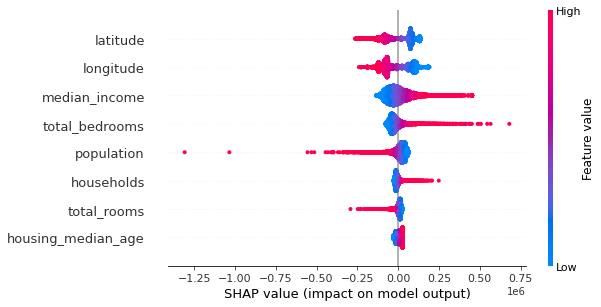

In [158]:
model = LinearRegression().fit(features, target)
explainer = shap.LinearExplainer(model, features)
shap_value = explainer.shap_values(features)
shap.summary_plot(shap_value, features)

In [ ]:
from 